In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Overview of the flips required

Depending on the properties of the original graph that should be preserved in NeSt samples, there are different flip strategies necessary

In [2]:
def draw_and_save(G, p, name, node_colors, positions = None, xlim=None, ylim=None, arrowsize=45):
    num_nodes = G.number_of_nodes()
    fig = plt.figure(figsize=(3,3))
    
    p.mkdir(parents=True, exist_ok=True)
    dx = 0.7
    dy=0.6
    if positions is None:
        positions = [(-dx,-dy), (-dx,dy), (dx,-dy), (dx,dy)]
    nx.draw(G,
            pos=positions,                             
            width=edge_width,
            node_size=1.5*node_size,
            node_color = node_colors,
           arrowsize=arrowsize,
           )
    a = 0.9
    b = a
    plt.axis("square")
    # fig.patch.set_facecolor('lightgray')
    if xlim is None:
        xlim =(-a,a)
    plt.xlim(*xlim)
    if ylim is None:
        ylim=(-b,b)
    plt.ylim(*ylim)
    
    plt.savefig(p/f"{name}.png", bbox_inches="tight", transparent=True, dpi=600)
    plt.show()

In [3]:
edge_width = 9
with_labels=True
node_size=850

## Preserving the in and out colors

Also called in-out NeSt or both-NeSt

You additionally also need the triangle flip approach

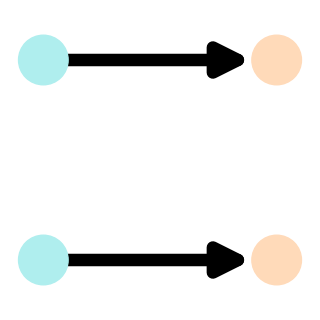

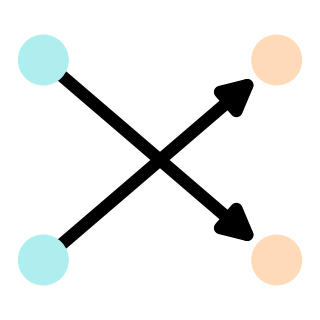

In [4]:
p = Path(f"./images/rewire_demo")

G = nx.DiGraph()
G.add_nodes_from(range(4))
G.add_edges_from([(0,2),(1,3)])

node_colors = ['paleturquoise',
               'paleturquoise',
                'peachpuff',
              'peachpuff',]
draw_and_save(G, p, "basic_dir", node_colors)

G2 = nx.DiGraph()
G2.add_nodes_from(range(4))
G2.add_edges_from([(0,3),(1,2)])
draw_and_save(G2, p, "basic_dir_flipped", node_colors)

## Preserving in colors plus out degree (Pagerank)

You additionally also need the triangle flip approach

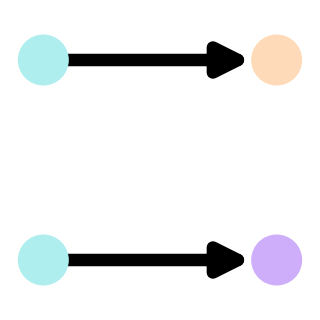

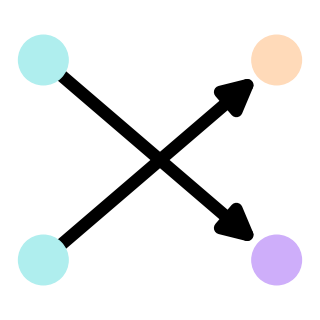

In [5]:
G = nx.DiGraph()
G.add_nodes_from(range(4))
G.add_edges_from([(0,2),(1,3)])

node_colors = ['paleturquoise',
               'paleturquoise',
                'xkcd:pale violet',
              'peachpuff',]
draw_and_save(G, p, "loose_dir", node_colors)

G2 = nx.DiGraph()
G2.add_nodes_from(range(4))
G2.add_edges_from([(0,3),(1,2)])
draw_and_save(G2, p, "loose_dir_flipped", node_colors)

## The triangle reverse

For both of the approaches presented above, a directed triangle reverse move is necessary for mono colored subgrahs

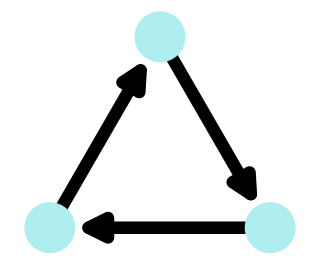

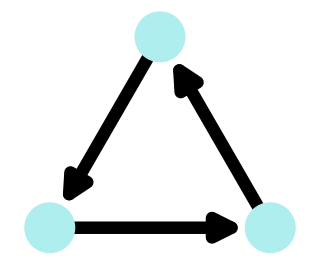

In [6]:
G = nx.DiGraph()
G.add_nodes_from(range(3))
G.add_edges_from([(0,1),(1,2), (2,0)])

node_colors = ['paleturquoise',
               'paleturquoise',
                'paleturquoise',]
h = 0.7
a = np.sqrt(4/3)*h
positions = [(0,h), (a/2, 0), (-a/2, 0)]
draw_and_save(G, p, "triangle_dir", node_colors, positions=positions,ylim =[-0.1,0.8], xlim=[-0.55,0.55], arrowsize=35)

G2 = nx.DiGraph()
G2.add_nodes_from(range(3))
G2.add_edges_from([(1,0),(2,1), (0,2)])
draw_and_save(G2, p, "triangle_dir_flipped", node_colors, positions=positions,ylim =[-0.1,0.8], xlim=[-0.55,0.55], arrowsize=35)

## Preserving only the in-colors

While it is possible todo MCMC sampling here, you can also use a direct sampling approach in this case.

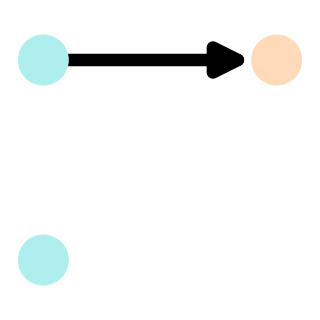

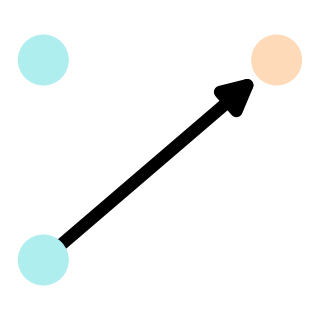

In [7]:
G = nx.DiGraph()
G.add_nodes_from([0,1,3])
G.add_edges_from([(1,3)])

node_colors = ['paleturquoise',
               'paleturquoise',
              'peachpuff',]
draw_and_save(G, p, "tilt_dir", node_colors)

G2 = nx.DiGraph()
G2.add_nodes_from([0,1,3])
G2.add_edges_from([(0,3)])
draw_and_save(G2, p, "tilt_dir_flipped", node_colors)